## What is Airbnb?

## Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#**STEP 1 : Importing libraries**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

# **STEP 2 : Importing Dataset From Drive**

In [ ]:
path = '/content/drive/My Drive'

In [ ]:
df =  pd.read_csv(path + '/Almabetter/AirBnb Analysis/Airbnb NYC 2019.csv')

# **STEP 3 : Having overview and understanding the dataset**

Pandas DataFrame info() Method

The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

Meaning of each column:
1. id = listing id 
2. name = Name of the Property    
3. host_id = Unique id for each listed host.  
4. host_name = Name of the host    
5. neighbourhood_group = location
6. neighbourhood = Area                                                 
7. latitude =  latitude coordinates                               
8. longitude = longitude                                           
9. room_type = listing space type 
10. price = Price in dollars 
11. minimum_nights =  Minimum nights required to stay 
12. number_of_reviews = No. of reviews written for the listing 
13. last_review = Last reviewed date for the listing 
14. reviews_per_month = Total review per month for the listing
15. calculated_host_listings_count = Total no of listing against the host id   
16. availability_365 = Number of days when listing is available for booking



## 1. Basic Data information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Pandas DataFrame describe() Method

The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. std - The standard deviation.

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


From the above result, we can see that,  
   
1.   Cheapest room starts from 0, which can't be possible.
2.   Mean price of room 152.72
3.   25% rooms have 0 availability over year, which makes no sense.
4.   Average availability of rooms in Airbnb is 112 days in a year
5.   Average minimum_night are 7



df. head() Method

Returns the first 5 rows of the dataframe. To override the default, you may insert a value between the parenthesis to change the number of rows returned.

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Pandas DataFrame isnull() Method

The isnull() method returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False.

In [ ]:
df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


The function dataframe. isnull(). sum(). sum() returns the number of missing values in the data set.

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

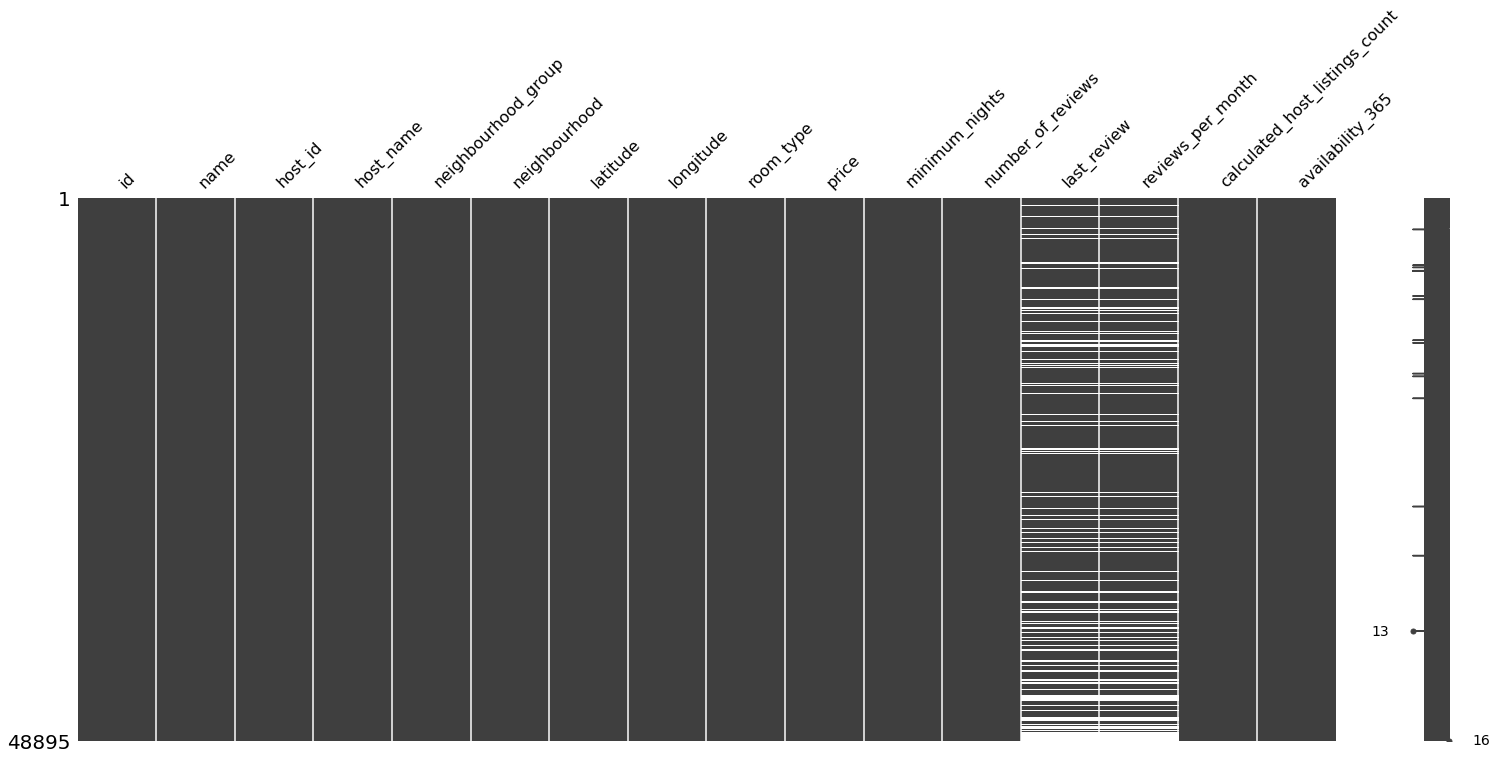

In [ ]:
msno.matrix(df)

In [ ]:
df.isnull().sum().sum()

20141

In [ ]:
#Finding unique values
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

From the above result, We can see that

1. There are not any duplicate values in id column.
2. Host_name have been repeated, so some customer have stayed in different property.
3. New york is divided in 5 neighbourhood group.
4. There are 3 types of room rented in New york.



For finding the unique values from neighbourhood_group column.

In [ ]:
# Finding types of neighbourhood Groups
pd.DataFrame(df.neighbourhood_group.unique(),columns = ['neighbourhood_group'])

,neighbourhood_group
0,Brooklyn
1,Manhattan
2,Queens
3,Staten Island
4,Bronx


We can see that, There are only 5 unique values

For finding theunique values from romm_type column

In [ ]:
# Finding types of Room type
pd.DataFrame(df.room_type.unique(),columns = ['room_type'])

,room_type
0,Private room
1,Entire home/apt
2,Shared room


We can see that, There are only 3 types of rooms

## 2. Data visualization

### 1. Corelation Matrix

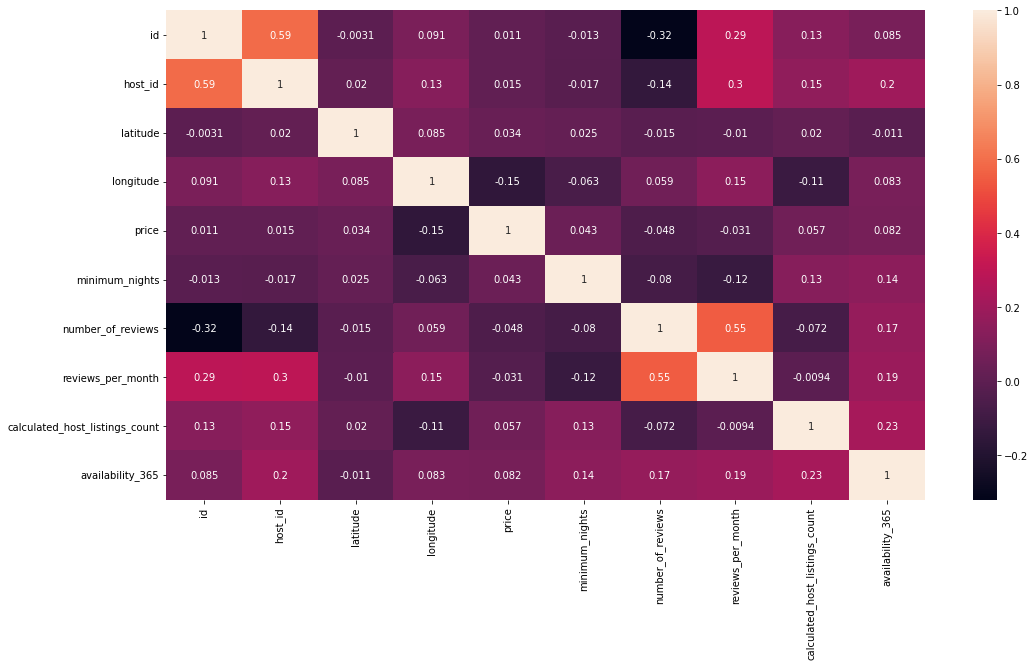

In [ ]:
corelation = df.corr()
plt.figure(figsize=(17,9))
sns.heatmap(corelation,  xticklabels = corelation.columns, yticklabels = corelation.columns, annot =True)

Conclusion:  number_of_reviews column and reviews_per_month column are some what related

### 2. Pair Plot

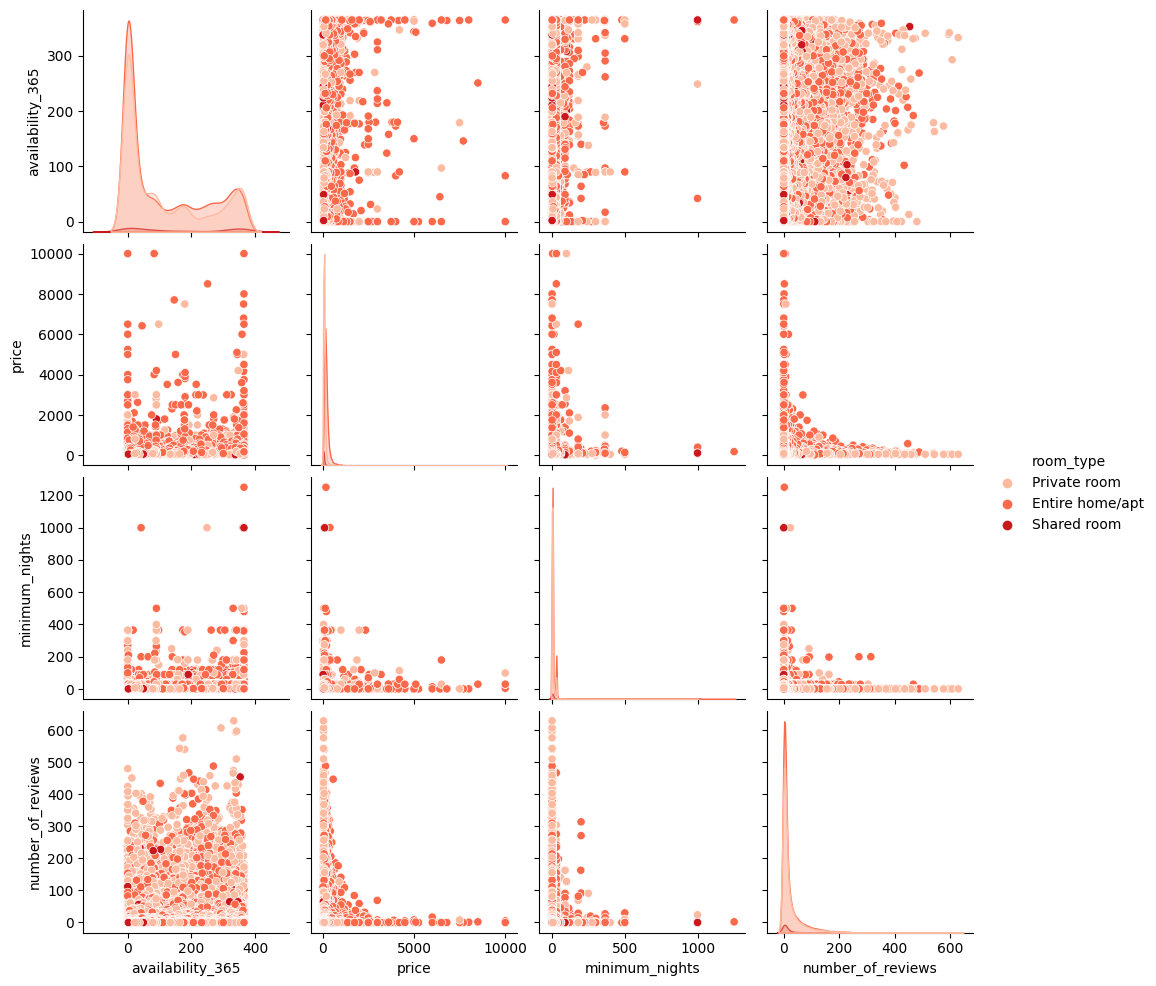

In [ ]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
df_pairplot = df[['availability_365','price','minimum_nights', 'room_type','number_of_reviews']].copy()
sns.pairplot(df_pairplot, hue= 'room_type', palette= 'Reds')

Conclusion: 
1. From minimum_nights vs availability_365 :-      unexpected minimum nights at 0 availability
2. From price and minimum nights :- As minimum nights of booking increase price decreases significantly.
3. From number of reviews and price :- There are more number of reviews where price is low
 

# **STEP 4 : Data Cleaning**

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Removed unecessary column names:

1. latitude
2. longitude
3. last_review 
4. reviews_per_month



In [ ]:
new_df = df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]
new_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


# **STEP 5 : Exploratory Data Analysis**

##1. What can we learn about different hosts and areas?

groupby() function is used to split the data into groups based on some criteria. pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names

In [ ]:
hosts_areas = new_df.groupby(['neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas

,neighbourhood_group,calculated_host_listings_count
0,Bronx,37
1,Brooklyn,232
2,Manhattan,327
3,Queens,103
4,Staten Island,8


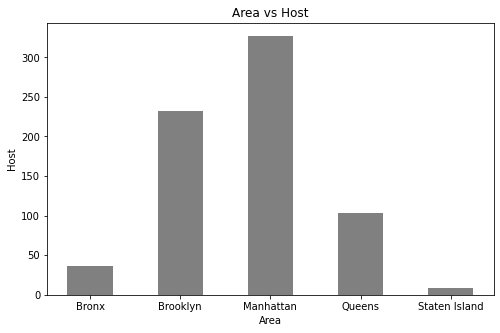

In [ ]:
area = hosts_areas['neighbourhood_group']
host = hosts_areas['calculated_host_listings_count']

fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(area, host, color ='gray',
        width = 0.5)
 
plt.xlabel("Area")
plt.ylabel("Host")
plt.title("Area vs Host")
plt.show()

As we can see most number of listings are from Manhattan created Sonder (NYC), Blueground,kara, kazuya

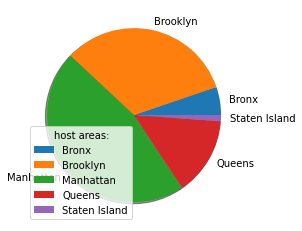

In [ ]:
host = hosts_areas['calculated_host_listings_count']
mylabels = hosts_areas['neighbourhood_group']

plt.pie(host, labels = mylabels, shadow = True)
plt.legend(title='host areas:')
plt.show() 

As we can see most number of listings are from Manhattan created Sonder (NYC), Blueground,kara, kazuya

##2. What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
areas_reviews = new_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


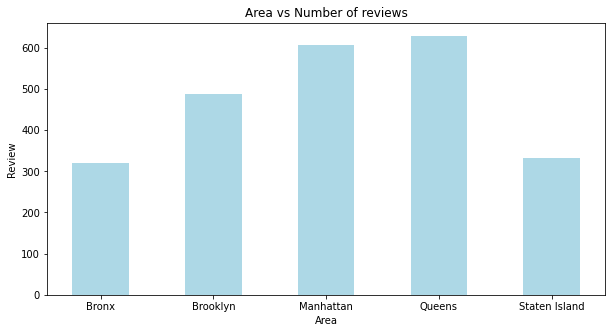

In [ ]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='lightblue',
        width = 0.5)
 
plt.xlabel("Area")
plt.ylabel("Review")
plt.title("Area vs Number of reviews")
plt.show()

In [ ]:
price_review = new_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_review.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


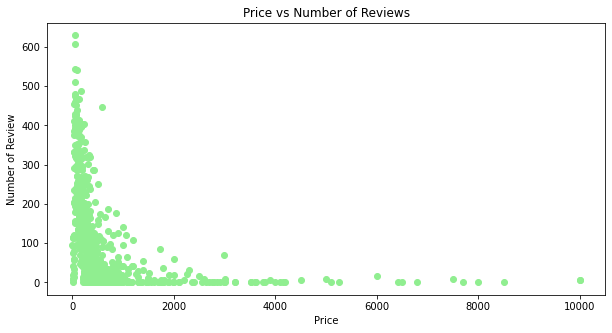

In [ ]:
area = price_review['price']
price = price_review['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price, color='lightgreen')
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

##From the above Analysis we can say that most people prefer to stay in place where price is less.

##3.Which hosts are the busiest and why?

---



In [ ]:
busiest_hosts = new_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


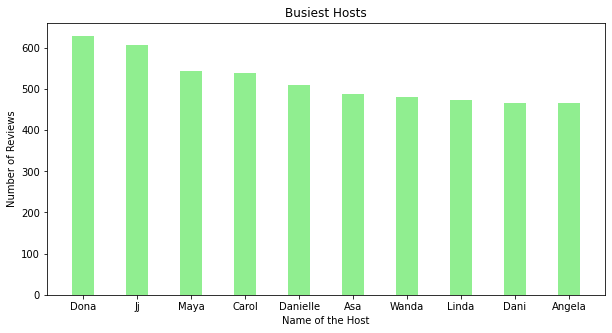

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='lightgreen',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

##4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
traffic_areas = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas.head(6)

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096


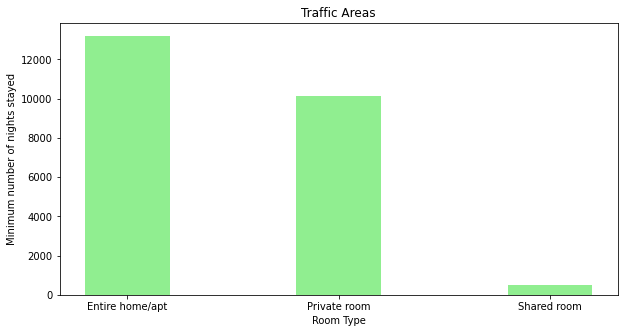

In [ ]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(room_type, stayed, color ='lightgreen',
        width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

###From the Above Analysis We can Stay that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.

##Conclusion:
###1. The people who prefer to stay in Entire home or  Apartment they are going to stay bit longer in that particular Neighbourhood only.
###2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
###3. Most people prefer to pay less price.
###4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
###5. If people are not staying more then one night means they are travellers.



---


#Thanks! 


